# Proposal's benchmark

We train the proposed algorithm on some classical benchmark datasets, such as:

* Iris: 150 samples (50 for each *Iris* variety), 4 features
* Chainlink: 1000 samples, 3-dimensional dataset of two chained rings
* Spiral: 700 samples of two clusters in spiral shape 
* Gaussian: 300 samples, a Gaussian-distributed dataset of 3 clusters, 100 for each

The choice of hyperparameters such as map dimension was decided by experimentation on each dataset.

In [6]:
# data-handling
import pandas as pd
import numpy as np
# plotagem
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# clustering
from clustering import cluster
from minisom import MiniSom
# artificial data
import sys
sys.path.append("..")
from artificial_data import normalized_data, labels, normalize
from sklearn.cluster import k_means, dbscan

In [23]:
def som_clustering(
    data,
    x,
    y,
    topology='rectangular',
    random_seed=None,
    num_iteration=None,
    prune_activity=False,
):
    som = MiniSom(x, y, data.shape[1], random_seed=random_seed, topology=topology)
    if num_iteration is None:
        num_iteration=10*data.shape[0]
    som.train(data, num_iteration=num_iteration)
    neuron_clusters = cluster(som, data, k=k, prune_activity=prune_activity)
    labels = np.array(
        [neuron_clusters[som.winner(x)] for x in data]
    )
    return labels

/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/home/pedrov/.virtualenvs/bolsa/lib/python3.11/site-packages/minisom.py:162: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


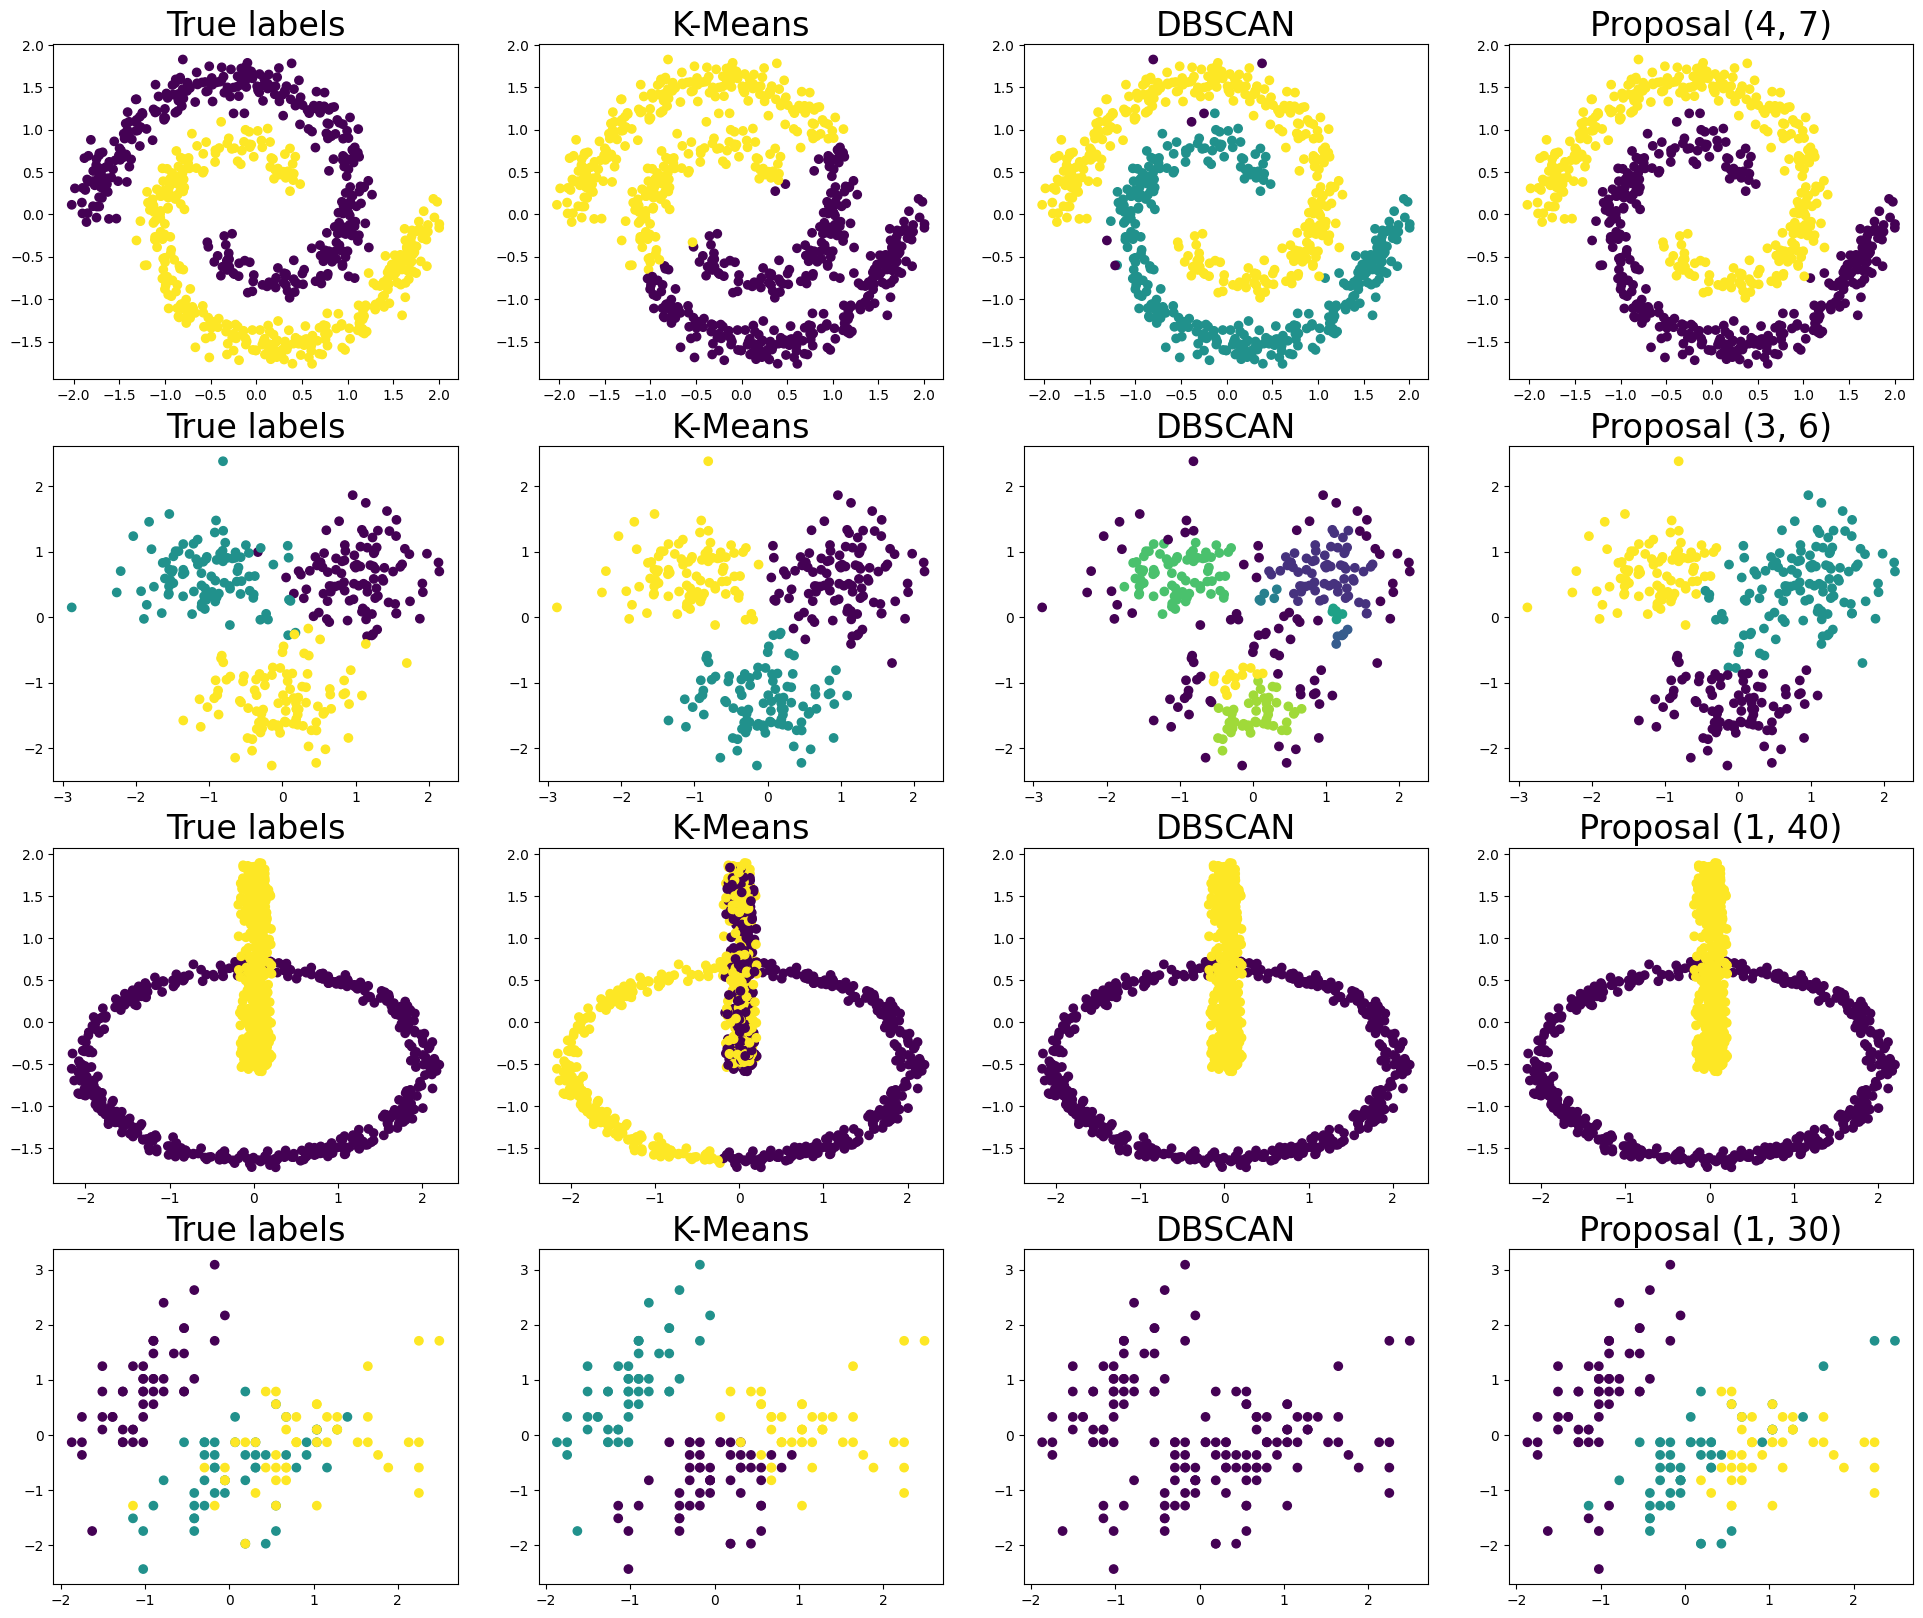

In [33]:
datasets = ['spiral', 'gaussian', 'chainlink', 'iris']
methods = {
    'proposal': som_clustering,
    'k_means': lambda X:k_means,
    'dbscan': dbscan,
}
som_shapes = {
    'spiral': (4, 7),
    'gaussian': (3, 6),
    'chainlink': (1, 40),
    'iris': (1, 30)
}
fig, axs = plt.subplots(4, 4)

for i, dataset in enumerate(datasets):
    data = normalized_data[dataset]
    shape = som_shapes[dataset]
    k = len(np.unique(labels[dataset]))
    
    data_labels = {
        'True labels': labels[dataset],
        'K-Means': k_means(
            data,
            n_clusters=k,
            n_init=10
        )[1],
        'DBSCAN': dbscan(data, eps=0.2)[1],
        'Proposal ' + str(shape): som_clustering(data, *shape, random_seed=42)
    }
    
    for j, source in enumerate(data_labels):
        axs[i, j].scatter(data[:, 0], data[:, 1], c=data_labels[source])
        axs[i, j].set_title(source, fontdict = {'fontsize': 24})

fig.set_size_inches(24, 20)